### Some prerequisite

In [265]:
# set random seed
import random
random.seed(10)


### Setting Hyperparameters

In [266]:
# hyperparameters:
LB = -15
UB = 15
UNIT = 1
NO_UPDATE_TIMES = 10e6

# Define iteration numbers
n = 2

# Set temperature reduction factor
c = 0.5

### Define Objective Function

In [267]:
import numpy as np

# Define the objective function
def f(x_1, x_2):
    return 6*(x_1**2)-6*x_1*x_2+2*(x_2**2)-x_1-2*x_2

print('objective function declaration succeed')

objective function declaration succeed


---
## 3D visualization

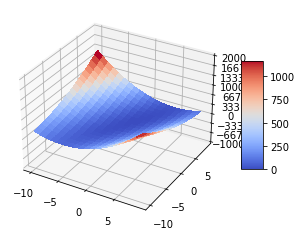

In [268]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

# set range
x_1 = np.arange(-10, 10, UNIT)
x_2 = np.arange(-10, 10, UNIT)
X, Y = np.meshgrid(x_1, x_2) # meshgrid: 接受兩個1D向量，生成一個座標矩陣
Z = f(X, Y)

# Plt the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-1000,2000)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

# Label for axes
plt.xlabel = '$x_1$'
plt.ylabel = '$x_2$'

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


---
### Define method "get_random": In order to sample form uniform distribution

In [269]:
def get_random(low, high, unit):
    return np.random.uniform(low, high, unit)

---
### Generating Initial points (where we start Random Walk)

In [270]:
# Initialization

# Randomly select a stating point

import numpy as np

# select an initial design point
x_1 = get_random(-LB, UB+0.1 ,1)
x_2 = get_random(-LB, UB+0.1 ,1)

X = []
objf_value = []

X.append([x_1, x_2])
print(f'randomly select an initial design point: {x_1, x_2}')

objf_value.append(f(x_1, x_2))
print(f'objective function value of $X_1$ is: {objf_value}')


randomly select an initial design point: (array([15.00621056]), array([15.05702094]))
objective function value of $X_1$ is: [array([403.73267901])]


---
### Main body of Random Walk process, start iterating

In [271]:
no_update_times = 0
current_x_1 = x_1
current_x_2 = x_2
while(no_update_times < NO_UPDATE_TIMES):
    attempt_x_1 = get_random(LB, UB+0.1 ,1)
    attempt_x_2 = get_random(LB, UB+0.1 ,1)

    if (f(attempt_x_1,attempt_x_2)<f(current_x_1, current_x_2)):
        X.append([attempt_x_1, attempt_x_2])
        current_x_1 = attempt_x_1
        current_x_2 = attempt_x_2

    else:
        no_update_times += 1

---
### Print the design points at each states

In [272]:
from numpy import array
import numpy as np
X = np.array(X)
print(X)
#print(array(X).shape)
#print(len(X))

[[[15.00621056]
  [15.05702094]]

 [[ 0.17134265]
  [-7.75331338]]

 [[-2.15859191]
  [-3.53651215]]

 [[ 3.24005654]
  [ 4.76546444]]

 [[ 1.83296011]
  [ 3.98876216]]

 [[ 1.2983085 ]
  [ 2.73181434]]

 [[ 1.36164805]
  [ 2.64752711]]

 [[ 1.27855629]
  [ 2.40706617]]

 [[ 1.37398438]
  [ 2.58410132]]]


---
### Print the objective function values at each step
* In order to check the solution is decending.

In [273]:
for i in range(len(X)):
    print(f(X[i][0], X[i][1]))


[403.73267901]
[143.71001035]
[16.39924771]
[2.99387022]
[-1.69903226]
[-3.00311491]
[-3.14339096]
[-3.16193397]
[-3.1631184]


---
### Finally, print the updated path on the contour graph
* We can see that the best solutions at each step is approaching to the location of minimum value on the curve of objective function.

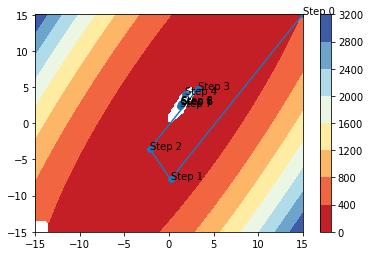

In [274]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

fig = plt.figure()

# 假設不同 state 的位置
plt.plot(X[:,0], X[:,1], 'o-')

# set dot labels
for i in range(len(X)):
    plt.annotate(f'Step {i}', (X[i,0], X[i,1]))


# 設定背景圖
N = 100
x = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)
y = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)

X, Y = np.meshgrid(x, y)


z = 6*(X**2)-6*X*Y+2*(Y**2)-X-2*Y

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)

cs = plt.contourf(X, Y, z, cmap='RdYlBu')

# add a colorbar
cbar = fig.colorbar(cs)

plt.show()


